<a href="https://colab.research.google.com/github/Lohith288/AI-ML-INTERNSHIP-VRSEC/blob/main/TASK12d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GETTING REQURIED LIBRARIES**

In [ ]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### **READING THE DATA SETS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/train.csv')


In [ ]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### **CHECKING THE DATA SET**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
import pandas as pd

for column in train.columns:
    unique_values = train[column].unique()
    length_of_unique_values = len(unique_values)

    print(f"Column '{column}' has {length_of_unique_values} unique values.")

Column 'battery_power' has 1094 unique values.
Column 'blue' has 2 unique values.
Column 'clock_speed' has 26 unique values.
Column 'dual_sim' has 2 unique values.
Column 'fc' has 20 unique values.
Column 'four_g' has 2 unique values.
Column 'int_memory' has 63 unique values.
Column 'm_dep' has 10 unique values.
Column 'mobile_wt' has 121 unique values.
Column 'n_cores' has 8 unique values.
Column 'pc' has 21 unique values.
Column 'px_height' has 1137 unique values.
Column 'px_width' has 1109 unique values.
Column 'ram' has 1562 unique values.
Column 'sc_h' has 15 unique values.
Column 'sc_w' has 19 unique values.
Column 'talk_time' has 19 unique values.
Column 'three_g' has 2 unique values.
Column 'touch_screen' has 2 unique values.
Column 'wifi' has 2 unique values.
Column 'price_range' has 4 unique values.


### **COLUMNS OF THE DATA SET**

In [ ]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### **CORRELATION MATRIX ***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

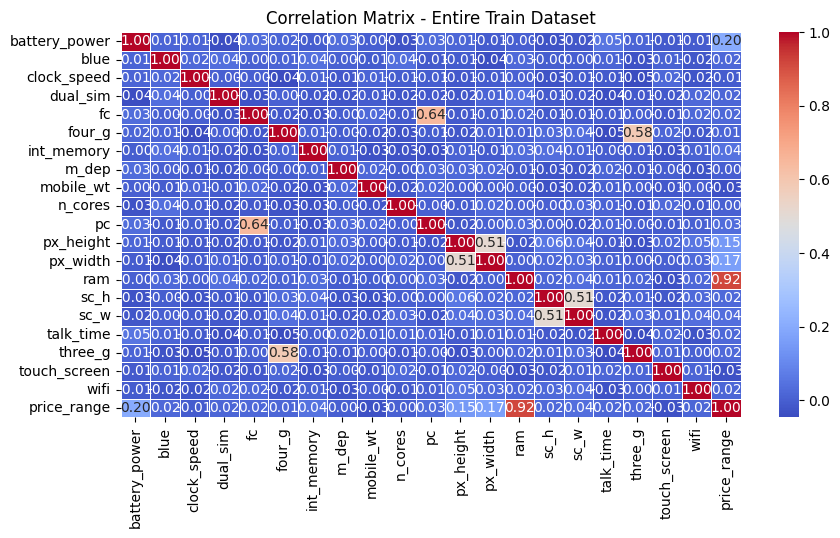

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'train' with your dataset
train = pd.read_csv('/content/train.csv')

# Calculate the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Entire Train Dataset')
plt.show()

In [ ]:
N = 10

# Calculate absolute correlation values for each feature
correlation_values = correlation_matrix.abs()

# Sort the correlation values in descending order
sorted_correlation = correlation_values.unstack().sort_values(ascending=False)

# Exclude self-correlations and duplicate correlations
sorted_correlation = sorted_correlation[sorted_correlation.index.get_level_values(0) != sorted_correlation.index.get_level_values(1)]

# Select the top 10 features with highest absolute correlation values
top_features = sorted_correlation[:N]

print("Top", N, "features based on correlation:")
print(top_features)

Top 10 features based on correlation:
price_range  ram            0.917046
ram          price_range    0.917046
fc           pc             0.644595
pc           fc             0.644595
three_g      four_g         0.584246
four_g       three_g        0.584246
px_width     px_height      0.510664
px_height    px_width       0.510664
sc_w         sc_h           0.506144
sc_h         sc_w           0.506144
dtype: float64


### **EDA**

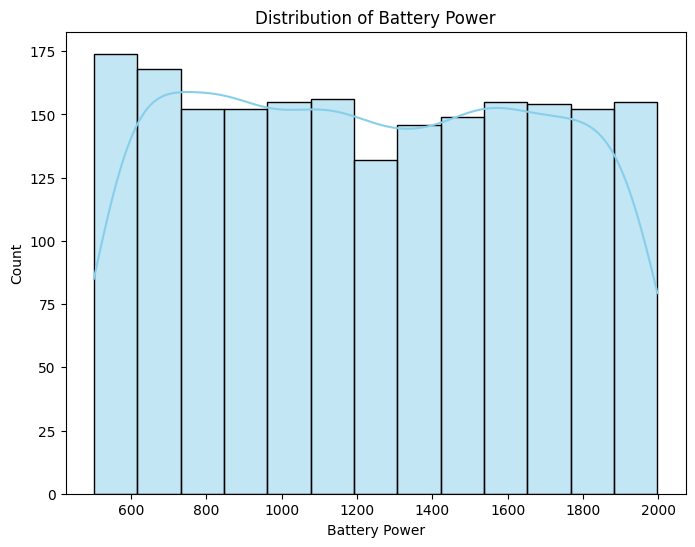

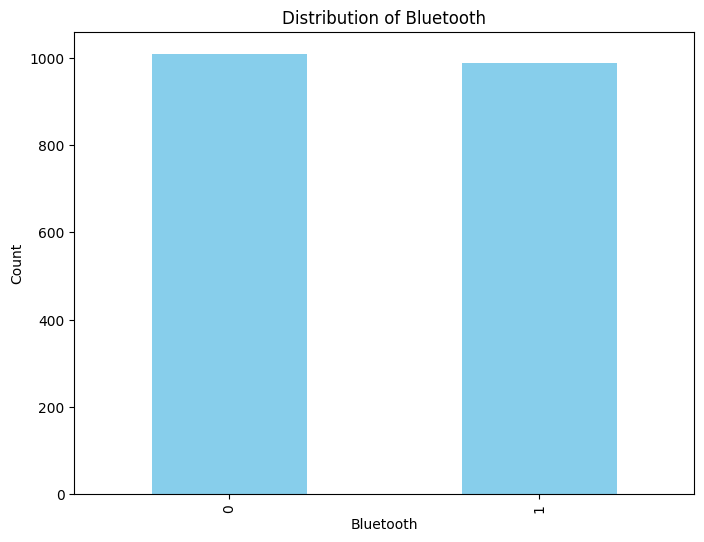

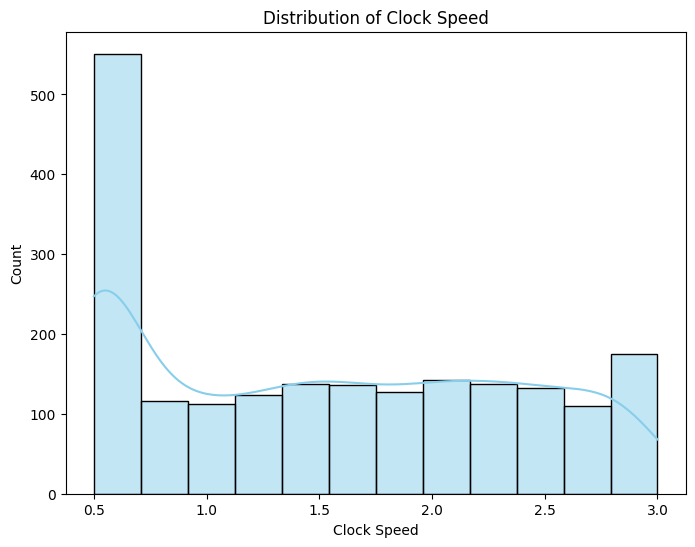

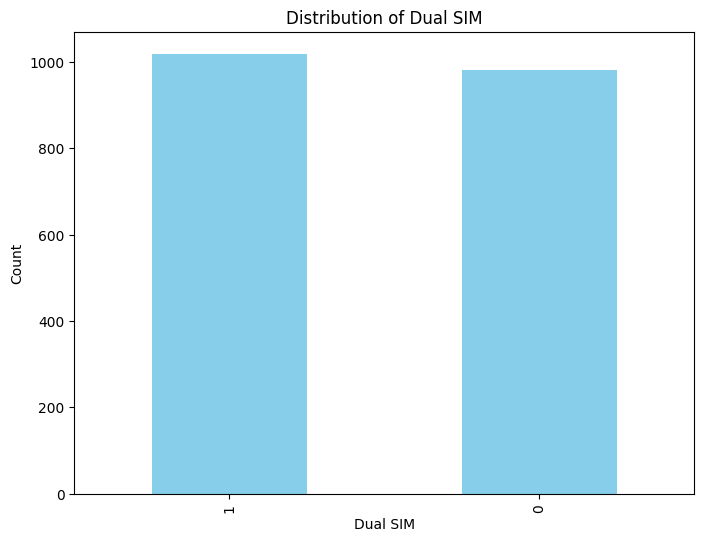

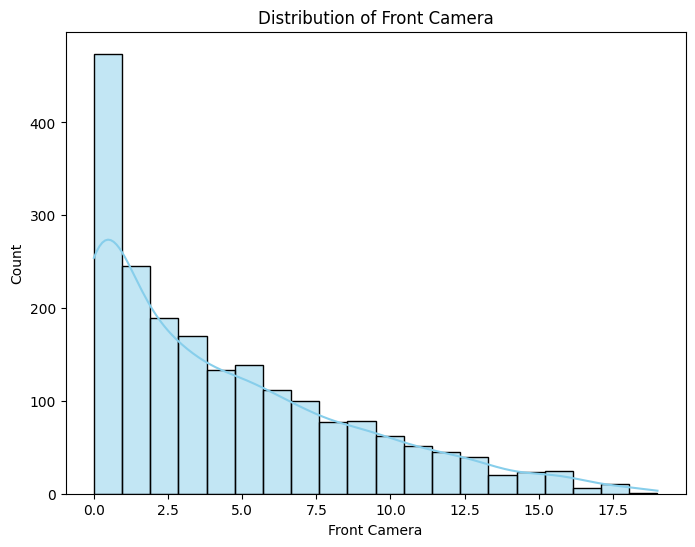

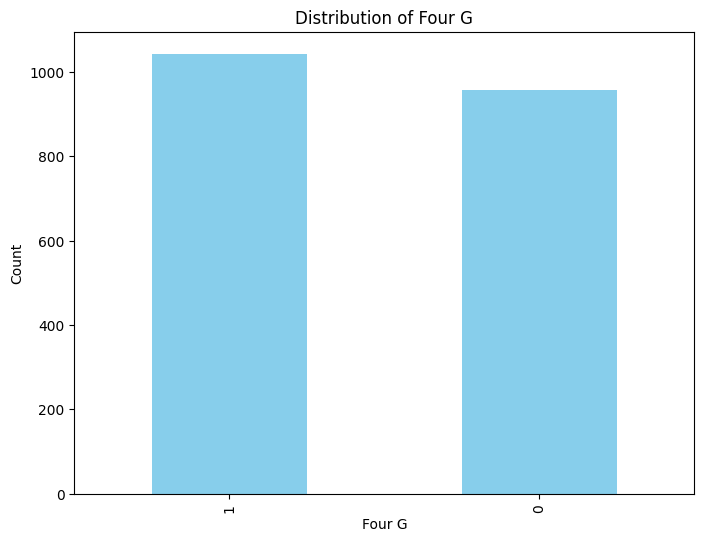

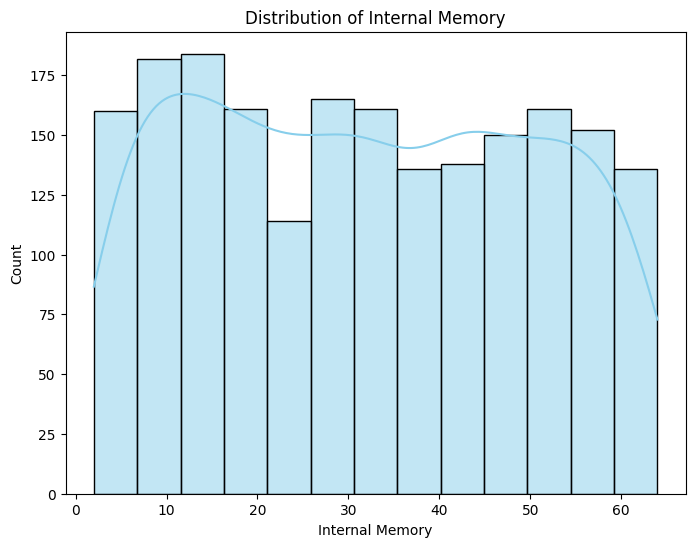

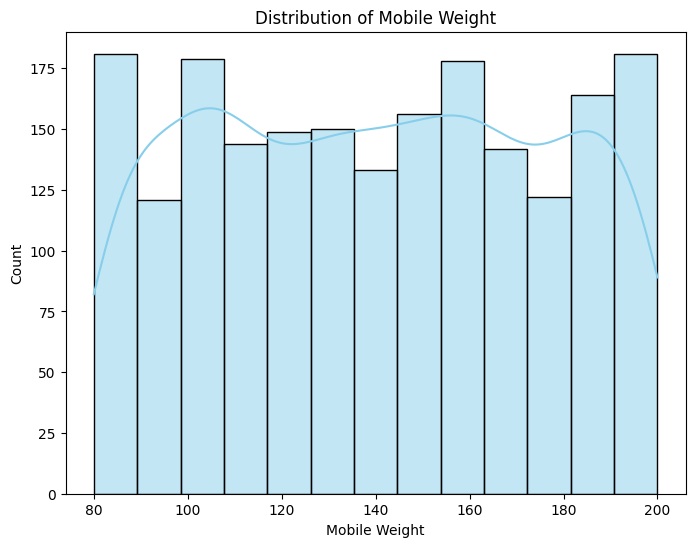

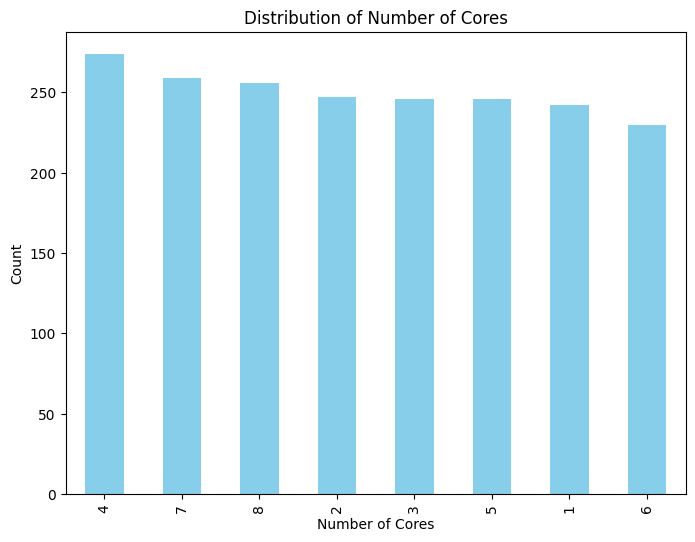

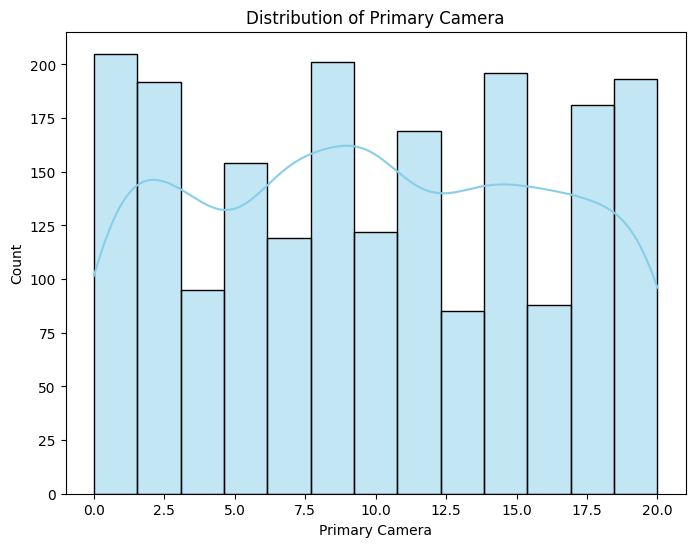

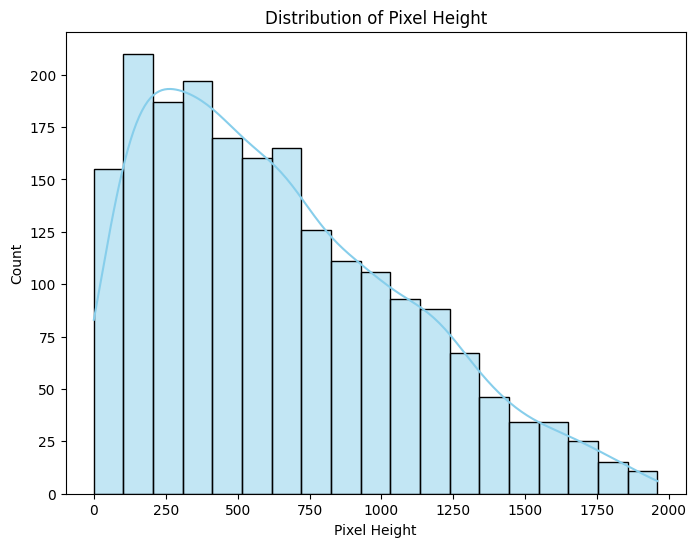

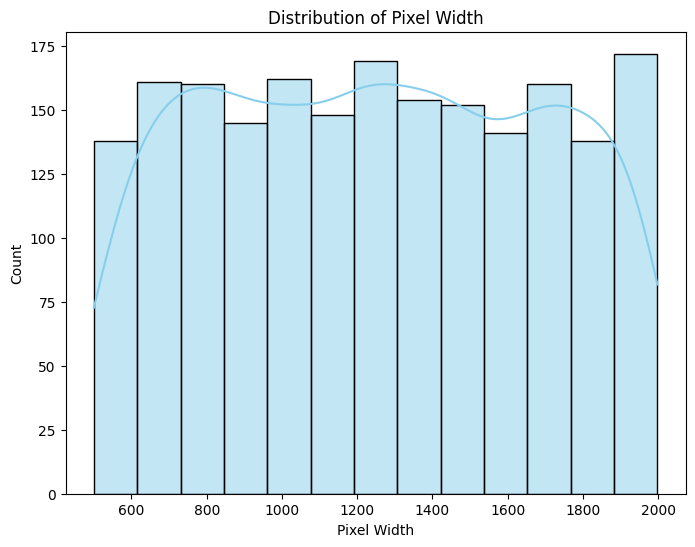

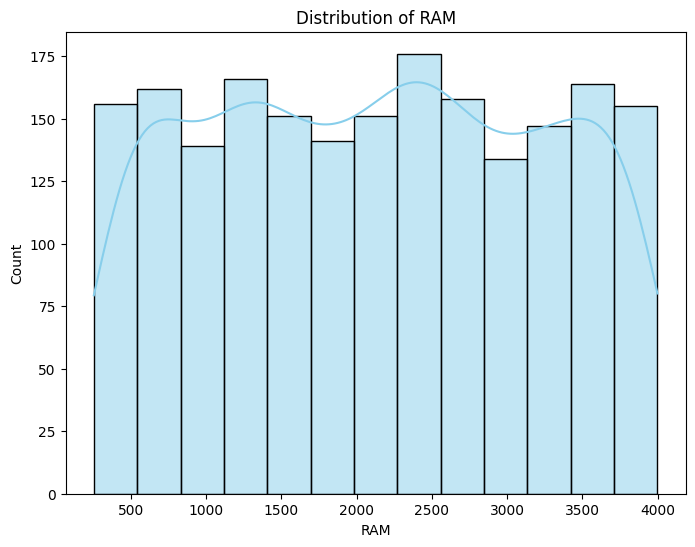

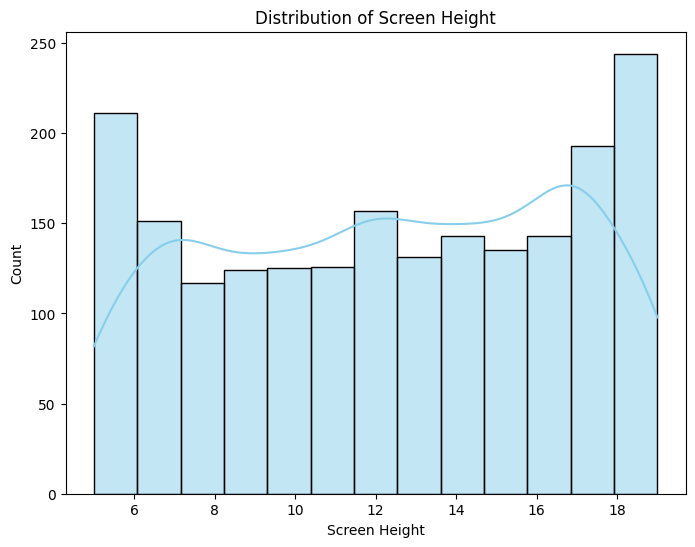

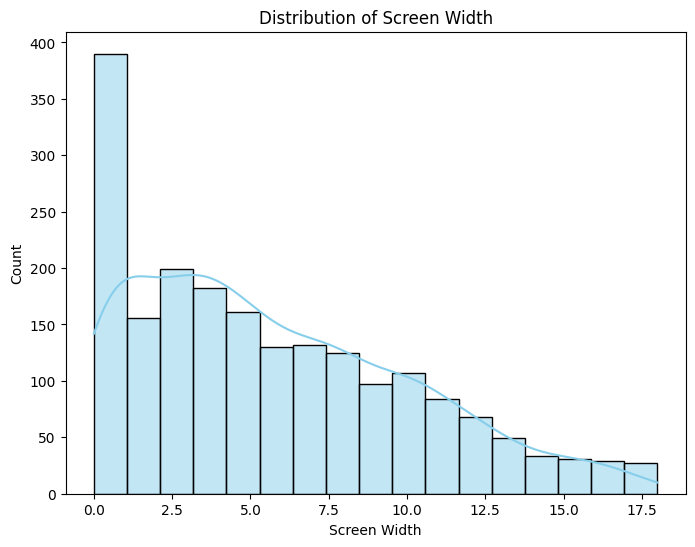

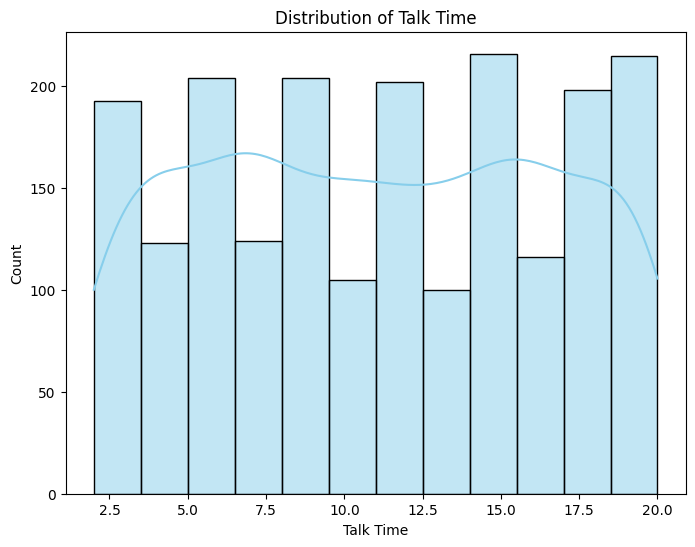

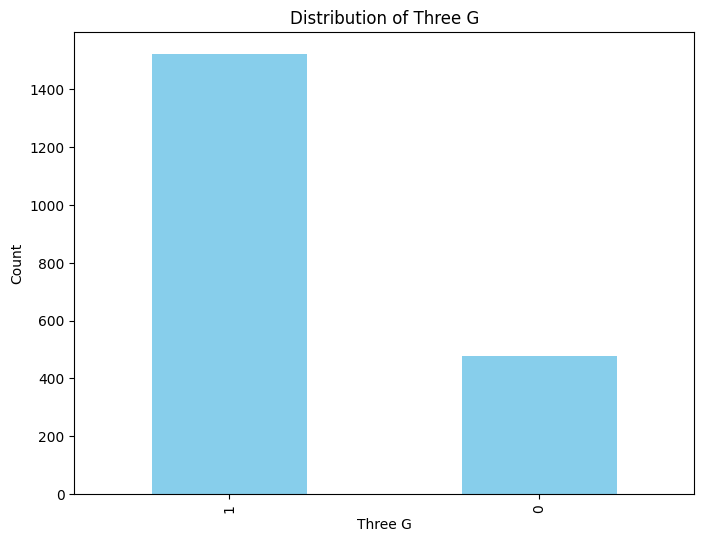

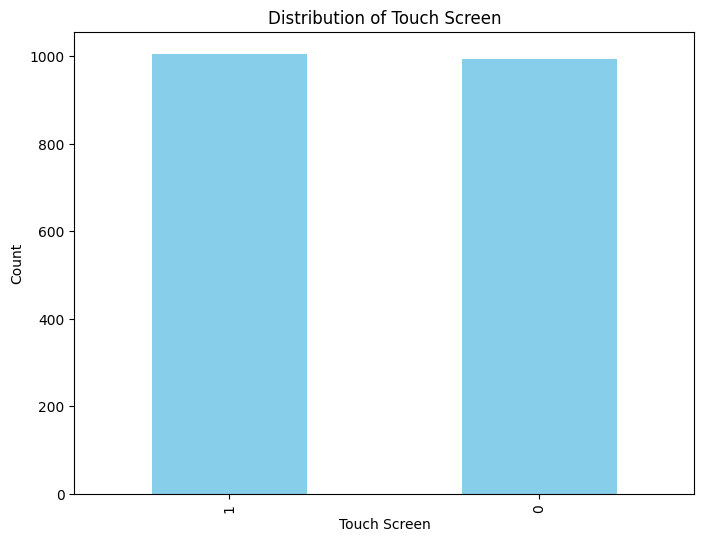

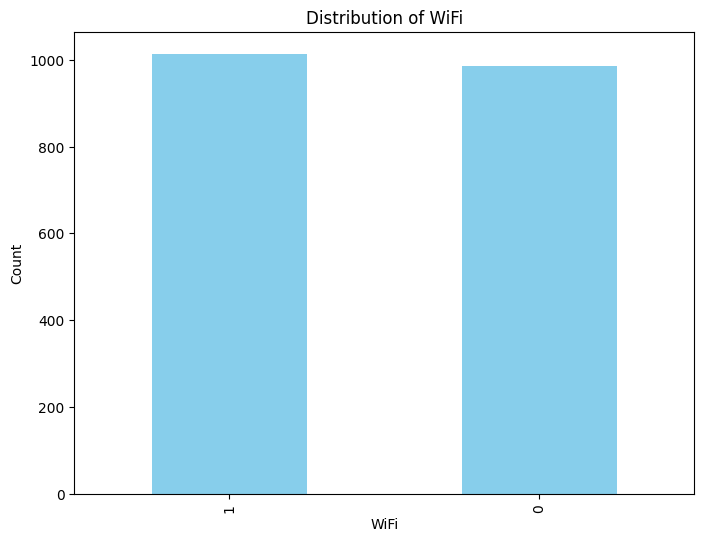

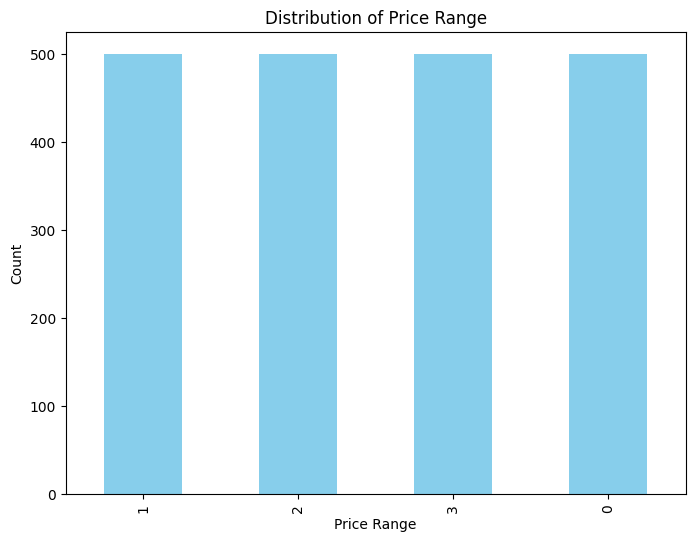

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')

# Battery Power
plt.figure(figsize=(8, 6))
sns.histplot(train['battery_power'], kde=True, color='skyblue')
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('Count')
plt.show()

# Blue
plt.figure(figsize=(8, 6))
train['blue'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Bluetooth')
plt.xlabel('Bluetooth')
plt.ylabel('Count')
plt.show()

# Clock Speed
plt.figure(figsize=(8, 6))
sns.histplot(train['clock_speed'], kde=True, color='skyblue')
plt.title('Distribution of Clock Speed')
plt.xlabel('Clock Speed')
plt.ylabel('Count')
plt.show()

# Dual SIM
plt.figure(figsize=(8, 6))
train['dual_sim'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Dual SIM')
plt.xlabel('Dual SIM')
plt.ylabel('Count')
plt.show()

# Front Camera
plt.figure(figsize=(8, 6))
sns.histplot(train['fc'], kde=True, color='skyblue')
plt.title('Distribution of Front Camera')
plt.xlabel('Front Camera')
plt.ylabel('Count')
plt.show()

# Four G
plt.figure(figsize=(8, 6))
train['four_g'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Four G')
plt.xlabel('Four G')
plt.ylabel('Count')
plt.show()

# Internal Memory
plt.figure(figsize=(8, 6))
sns.histplot(train['int_memory'], kde=True, color='skyblue')
plt.title('Distribution of Internal Memory')
plt.xlabel('Internal Memory')
plt.ylabel('Count')
plt.show()

# Mobile Weight
plt.figure(figsize=(8, 6))
sns.histplot(train['mobile_wt'], kde=True, color='skyblue')
plt.title('Distribution of Mobile Weight')
plt.xlabel('Mobile Weight')
plt.ylabel('Count')
plt.show()

# Number of Cores
plt.figure(figsize=(8, 6))
train['n_cores'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Cores')
plt.xlabel('Number of Cores')
plt.ylabel('Count')
plt.show()

# Primary Camera
plt.figure(figsize=(8, 6))
sns.histplot(train['pc'], kde=True, color='skyblue')
plt.title('Distribution of Primary Camera')
plt.xlabel('Primary Camera')
plt.ylabel('Count')
plt.show()

# Pixel Height
plt.figure(figsize=(8, 6))
sns.histplot(train['px_height'], kde=True, color='skyblue')
plt.title('Distribution of Pixel Height')
plt.xlabel('Pixel Height')
plt.ylabel('Count')
plt.show()

# Pixel Width
plt.figure(figsize=(8, 6))
sns.histplot(train['px_width'], kde=True, color='skyblue')
plt.title('Distribution of Pixel Width')
plt.xlabel('Pixel Width')
plt.ylabel('Count')
plt.show()

# RAM
plt.figure(figsize=(8, 6))
sns.histplot(train['ram'], kde=True, color='skyblue')
plt.title('Distribution of RAM')
plt.xlabel('RAM')
plt.ylabel('Count')
plt.show()

# Screen Height
plt.figure(figsize=(8, 6))
sns.histplot(train['sc_h'], kde=True, color='skyblue')
plt.title('Distribution of Screen Height')
plt.xlabel('Screen Height')
plt.ylabel('Count')
plt.show()

# Screen Width
plt.figure(figsize=(8, 6))
sns.histplot(train['sc_w'], kde=True, color='skyblue')
plt.title('Distribution of Screen Width')
plt.xlabel('Screen Width')
plt.ylabel('Count')
plt.show()

# Talk Time
plt.figure(figsize=(8, 6))
sns.histplot(train['talk_time'], kde=True, color='skyblue')
plt.title('Distribution of Talk Time')
plt.xlabel('Talk Time')
plt.ylabel('Count')
plt.show()

# Three G
plt.figure(figsize=(8, 6))
train['three_g'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Three G')
plt.xlabel('Three G')
plt.ylabel('Count')
plt.show()

# Touch Screen
plt.figure(figsize=(8, 6))
train['touch_screen'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Touch Screen')
plt.xlabel('Touch Screen')
plt.ylabel('Count')
plt.show()

# WiFi
plt.figure(figsize=(8, 6))
train['wifi'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of WiFi')
plt.xlabel('WiFi')
plt.ylabel('Count')
plt.show()

# Price Range
plt.figure(figsize=(8, 6))
train['price_range'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


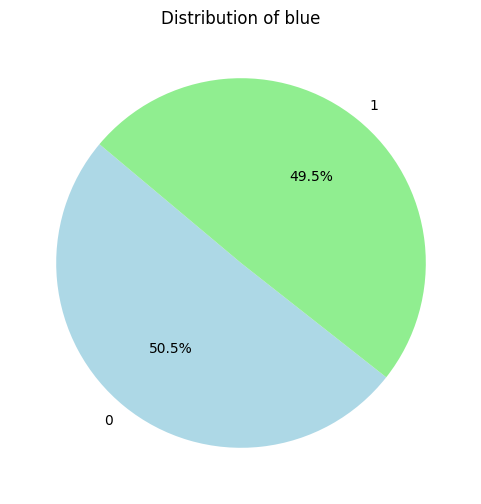

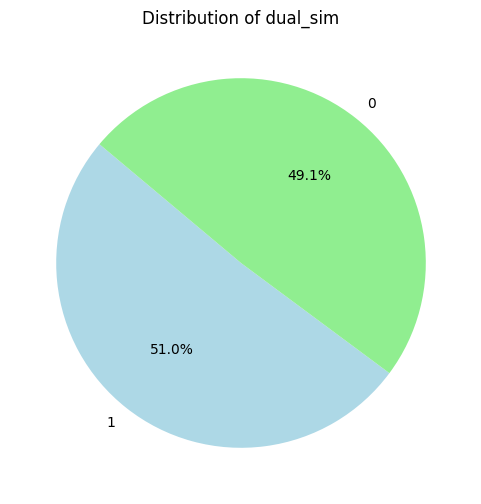

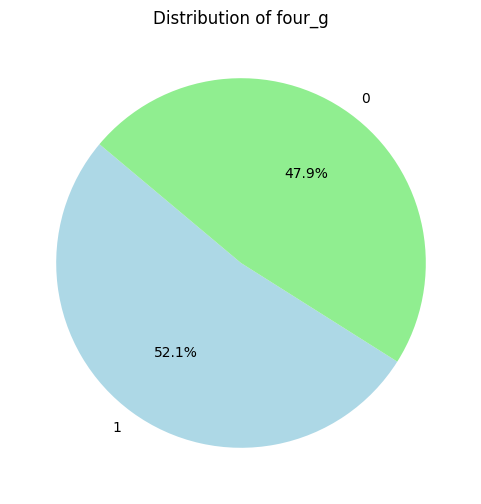

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')

# Selecting three columns for pie charts
columns_for_pie = ['blue', 'dual_sim', 'four_g']

# Define colors for each category
colors = ['lightblue', 'lightgreen']

# Generate pie charts
for column in columns_for_pie:
    plt.figure(figsize=(6, 6))
    train[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()



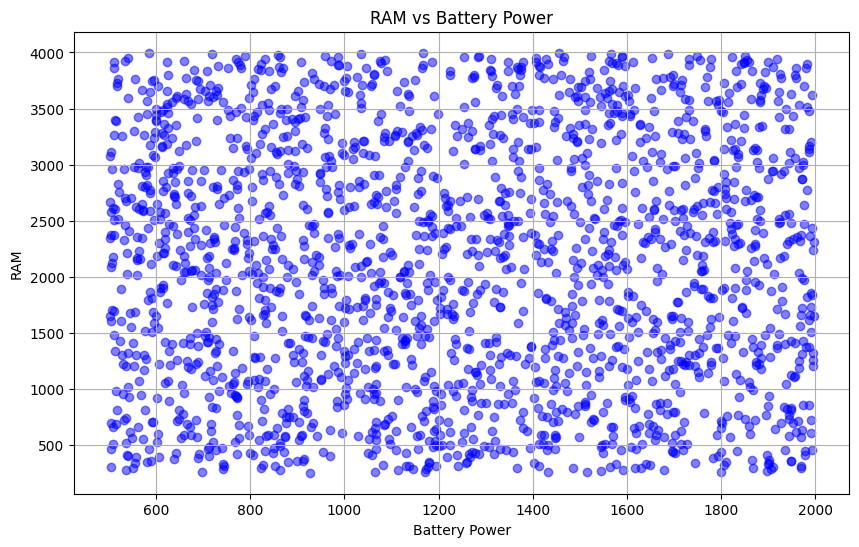

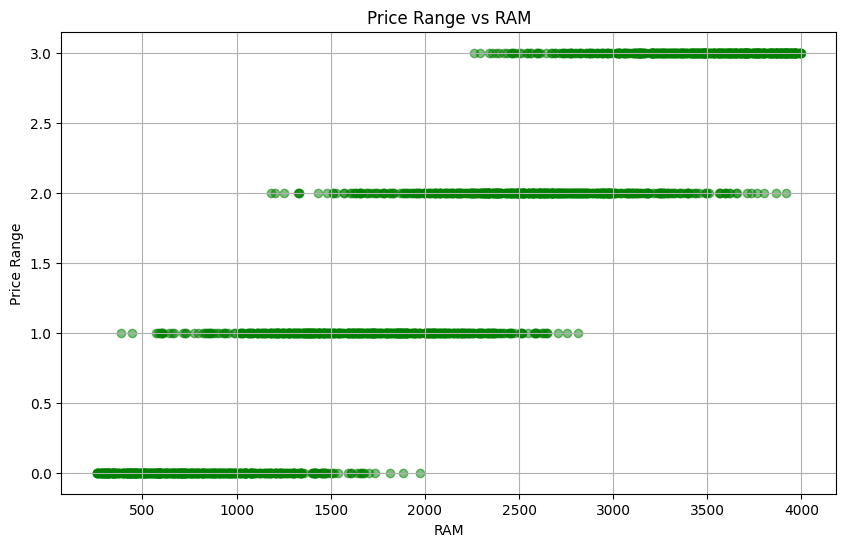

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
mobile_data = pd.read_csv("/content/train.csv")

# Scatter plot: RAM vs Battery Power
plt.figure(figsize=(10, 6))
plt.scatter(mobile_data['battery_power'], mobile_data['ram'], alpha=0.5, color='blue')
plt.title('RAM vs Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.grid(True)
plt.show()

# Scatter plot: Price vs RAM
plt.figure(figsize=(10, 6))
plt.scatter(mobile_data['ram'], mobile_data['price_range'], alpha=0.5, color='green')
plt.title('Price Range vs RAM')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.grid(True)
plt.show()


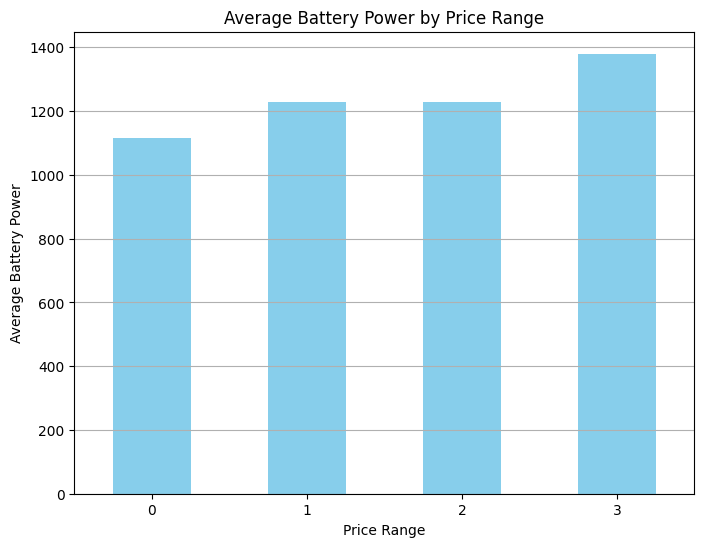

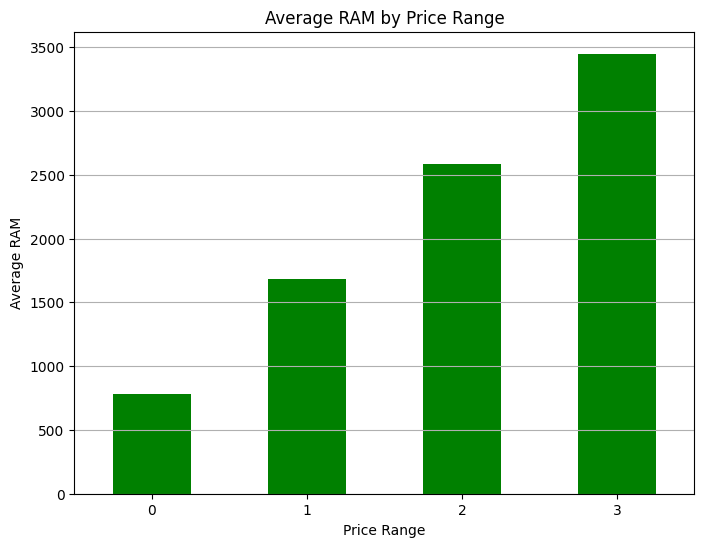

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Calculate average battery_power for each price_range
avg_battery_power = mobile_data.groupby('price_range')['battery_power'].mean()

# Plot bar plot for average battery_power
plt.figure(figsize=(8, 6))
avg_battery_power.plot(kind='bar', color='skyblue')
plt.title('Average Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Battery Power')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Calculate average ram for each price_range
avg_ram = mobile_data.groupby('price_range')['ram'].mean()

# Plot bar plot for average ram
plt.figure(figsize=(8, 6))
avg_ram.plot(kind='bar', color='green')
plt.title('Average RAM by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average RAM')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


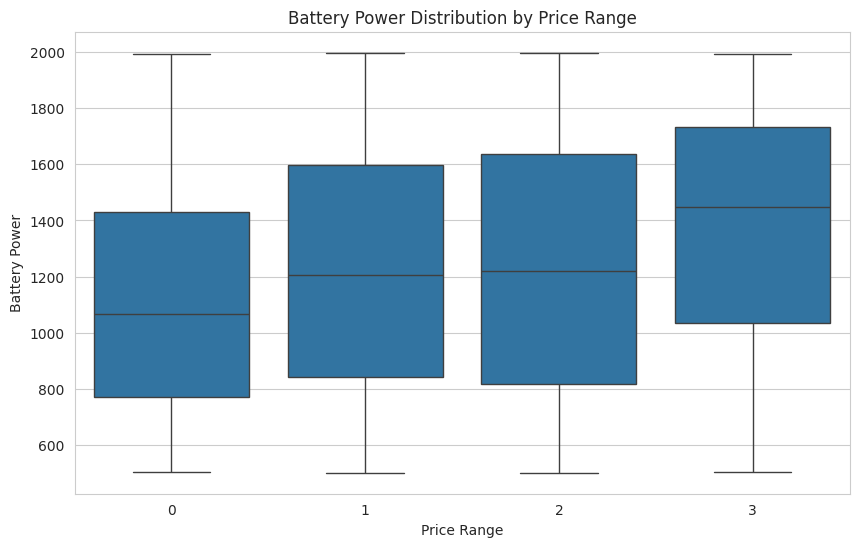

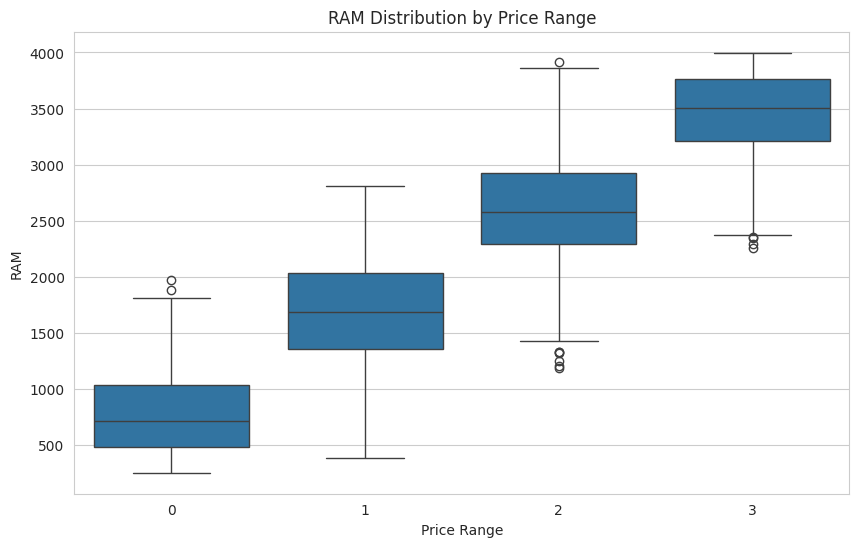

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Set the style for the seaborn plots


# Box plot for battery_power by price_range
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='battery_power', data=mobile_data)
plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

# Box plot for RAM by price_range
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=mobile_data)
plt.title('RAM Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()


### **CLASSIFICATION USING GRID SEARCH**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predictions on the testing set
rf_test_predictions = rf_classifier.predict(X_test)

rf_train_predictions = rf_classifier.predict(X_train)

In [ ]:
import numpy as np
# You can also use cross-validation to evaluate the model
accuracies = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Mean Cross-Validation Accuracy:", np.mean(accuracies))

conf_matrix=confusion_matrix(y_test, rf_test_predictions)
print("confusion matrix:",conf_matrix)

rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print(f"Random Forest Accuracy for training: {rf_train_accuracy}")

rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print(f"Random Forest Accuracy for testing: {rf_test_accuracy}")

Mean Cross-Validation Accuracy: 0.869375
confusion matrix: [[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]
Random Forest Accuracy for training: 1.0
Random Forest Accuracy for testing: 0.8925


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, y_train, X_test for training and testing data

# Define the features you want to use
features = ['ram', 'battery_power', 'px_height', 'px_width']

# Extract the selected features from the training and testing datasets
X_train_selected = X_train[features]
X_test_selected = X_test[features]

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the testing set
rf_predictions = rf_classifier.predict(X_test_selected)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9325


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

rf_best = grid_search_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8925


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("mobile price classification.csv")

# Prepare X and y
X = df.drop(['price_range'], axis=1)
y = df['price_range']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their respective parameter grids
models = {
    'RandomForestClassifier': (RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),
    'SVC': (SVC(), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf`', 'sigmoid']
    }),
    'KNeighborsClassifier': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    'DecisionTreeClassifier': (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }),
    'XGBoost': (XGBClassifier(), {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'reg_alpha': [0.0, 0.1, 0.5],
        'reg_lambda': [0.0, 0.1, 0.5]
    })
}

# Iterate over models, perform GridSearchCV, and print results
for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy score for {model_name}: {grid_search.best_score_}")

    # Evaluate model on test set
    y_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy score for {model_name}: {test_accuracy}\n")


Performing GridSearchCV for RandomForestClassifier...
Best parameters for RandomForestClassifier: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy score for RandomForestClassifier: 0.88125
Test accuracy score for RandomForestClassifier: 0.9

Performing GridSearchCV for SVC...
Best parameters for SVC: {'C': 100, 'kernel': 'linear'}
Best accuracy score for SVC: 0.97625
Test accuracy score for SVC: 0.9725

Performing GridSearchCV for KNeighborsClassifier...
Best parameters for KNeighborsClassifier: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best accuracy score for KNeighborsClassifier: 0.9268750000000001
Test accuracy score for KNeighborsClassifier: 0.955

Performing GridSearchCV for DecisionTreeClassifier...
Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best accuracy score for DecisionTr